# SITUATION

Lets consider a smalll ice cream business and in order to predict the expected earnings from a whole day of work, we can create a machine learning model that compares the past earnings per day in relation to the temperature.

To do so I am using a Linear Regression model and a data set that presents:

- Independant variable X: Outside Air Temperature (DegC)
- Dependant variable Y: Overall daily revenue generated in dollars ($)

# #1 IMPORT LIBRARIES 


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# #2 IMPORT DATASET

In [2]:
IceCream = pd.read_csv('IceCreamData.csv') #Upload the dataset to the programme and display it on the screen.
IceCream

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [3]:
IceCream.describe() #Obtaining general information about the dataset. The number of elements on the dataset, the mean, standard deviation, etc.

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [4]:
type(IceCream) #Showing the type of object we are working with.

pandas.core.frame.DataFrame

In [5]:
IceCream.info() #Obtaining more general information about the dataset like the memory that it occupies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


# #3 VISUALIZE DATASET

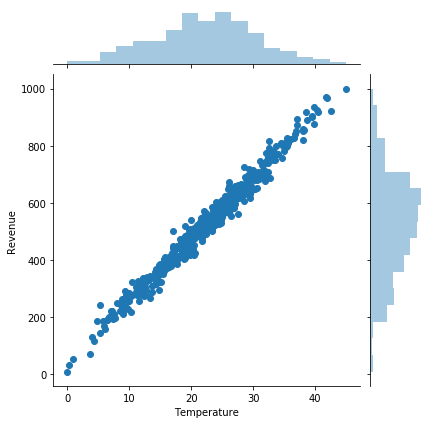

In [6]:
sns.jointplot(x = 'Temperature', y = 'Revenue', data = IceCream) #Plotting Revenue per day as a function of the emperature in that given day.

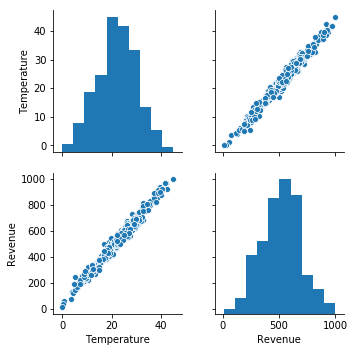

In [7]:
sns.pairplot(IceCream) #Other method of visualization for Temperature against Revenue and viceversa.

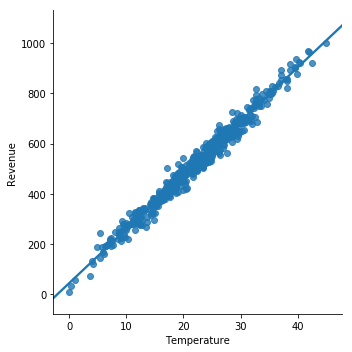

In [8]:
sns.lmplot( x = 'Temperature', y = 'Revenue', data = IceCream) #Selecting and visualizing the Revenue against the Temperature and plotting a line of best fit to check how the graph tends to behave.

# #4 CREATE TESTING AND TRAINING DATASET

In [9]:
x = IceCream[['Temperature']] #Defining 'x' as all the information on the Temperature column.

In [10]:
y = IceCream[['Revenue']] #Defining 'y' as all the information on the Revenue column.

In [11]:
from sklearn.model_selection import train_test_split #Importing machine learning library.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) #Defyning what percentage of values from x and y are for training and for testing the model. Assigning 25% of values to testing porpoises.

In [13]:
x_train #Values from x used to train the machine learning model. Randomly organized. 75%

,Temperature
213,23.153002
241,23.385145
149,12.442650
24,23.881725
471,19.494743
184,29.129128
379,39.859396
78,28.701276
119,25.496624
231,20.153345


In [14]:
x_test  #Values from x used to test the machine learning model. Randomly organized. 25%

,Temperature
217,22.653136
451,21.610644
7,30.833985
438,17.132795
189,30.330332
64,20.511637
335,24.818754
456,37.127070
32,8.790953
75,28.790102


In [15]:
y_train  #Values from y used to train the machine learning model. Randomly organized. 75%

,Revenue
213,506.493748
241,506.432135
149,274.065619
24,523.124547
471,429.435702
184,652.005408
379,875.019348
78,651.186242
119,596.236690
231,449.112869


In [16]:
y_test  #Values from y used to train the machine learning model. Randomly organized. 25%

,Revenue
217,532.054020
451,537.664801
7,696.716640
438,412.082357
189,691.958006
64,498.757050
335,598.676197
456,892.947720
32,237.763911
75,653.986736


# #5 TRAIN THE MODEL

In [17]:
from sklearn.linear_model import LinearRegression #Import the Linear Regression library as our machine learning model.

In [18]:
regressor = LinearRegression(fit_intercept = True) #Intercept values from the graph accepted. Neededd for improvement on accuracy.

In [19]:
regressor.fit(x_train, y_train) #Select the trained data and fit it on the Linear Regression model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print('Linear model coefficient (m)', regressor.coef_) #Print the linear coeficient (m) of this dataset. Corresponds to the mathematical equation y = mx + b.

Linear model coefficient (m) [[21.4959831]]


In [21]:
print('Linear model coefficient (b)', regressor.intercept_) #Print the linear coeficient (b) of this dataset. Corresponds to the mathematical equation y = mx + b.

Linear model coefficient (b) [42.99110789]


# #6 TEST THE MODEL 

In [22]:
x_train.shape #Print the shape of the trained x data.

(375, 1)

In [23]:
y_train.shape #Print the shape of the trained y data.

(375, 1)

In [24]:
x_test.shape #Print the shape of the tested x data.

(125, 1)

In [41]:
y_test.shape #Print the shape of the tested y data.

(125, 1)

Text(0.5, 1.0, 'Revenue Vs. Temperature [Training Data]')

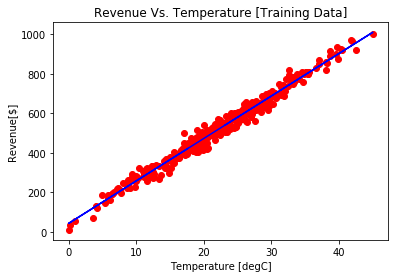

In [26]:
plt.scatter(x_train, y_train, color = 'red') #Plot a graph with the trained data for the Revenue against the Temperature in red.
plt.plot(x_train, regressor.predict(x_train), color = 'blue') #Add a line of best fit for this condition.
plt.ylabel('Revenue[$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Vs. Temperature [Training Data]')

Text(0.5, 1.0, 'Revenue Vs. Temperature [Testing Data]')

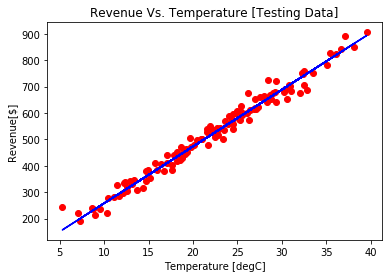

In [27]:
plt.scatter(x_test, y_test, color = 'red') #Plot a graph with the tested data for the Revenue against the Temperature in red.
plt.plot(x_test, regressor.predict(x_test), color = 'blue') #Add a line of best fit for this condition.
plt.ylabel('Revenue[$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Vs. Temperature [Testing Data]')

# #7 RESULTS

#### An example of the expected revenue if a given day presents 35 degrees Celsius.

In [42]:
Sample_Test = np.array([[35]]) #Set the temperature to 35 degrees as an example.
y_predict_test = regressor.predict(Sample_Test) #Use the data trained to predict the revenue when at 35 decgrees Celsius and check if it satisfies the Revenue Vs. Temperature [Testing Data] graph.
y_predict_test

array([[795.35051626]])

#### A programme that allows the owner of the bussines to add the temperature on a given day and then see his expected revenue. 

#### Using this method, he/she can see if the revenue predicted to obtain will cover the expenses needed to put it up for running on the day and consider if it will be worth the effort.

In [46]:
degrees = float(input("Enter today's temprature in Cº: ")) #Allow the user to enter any number as the temperature.
Today_T = np.array([[degrees]]) #Upload the number to the programme.
predict_revenue = regressor.predict(Today_T) #Use the data trained to predict the revenue when at the user's chosen temperature in decgrees Celsius.
print('Expected benefits= ', predict_revenue, '$')

Enter today's temprature in Cº: 100.2
Expected benefits=  [[2196.88861413]] $
